# Comment construire un modèle de classification multiple ? 

**Classification multiple** = Le fait de classiffier un objet selon n catégories. Exemple = est ce que ce nombre est 1, 2, 3 ou 4 ?

#### Importation des données
Nous importons le dataset `Reuters` qui contient des nouvelles classées en 46 catégories différentes. Ces données sont utilisées pour apprendre à notre modèle comment classer des articles de presse en catégories.

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
len (train_data)

8982

#### Prétraitement des données
Les données textuelles sont converties en séquences de nombres, où chaque nombre représente un mot dans le dictionnaire des données. 

Pour préparer ces séquences pour le modèle de réseau de neurones, nous les vectorisons en tableaux binaires de dimension fixe. Cela implique de transformer chaque séquence en un vecteur de 0 et de 1, où chaque position représente la présence ou non d'un mot spécifique dans la séquence.

In [ ]:
# Transformation des données en vecteurs 
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros ((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        results [i, sequence] = 1. 
    return results

# Vectorisation des données d'apprentissage 
x_train = vectorize_sequences(train_data)
# Vectorisation des données de test 
x_test = vectorize_sequences(test_data)

#### Transformation des étiquettes
Les étiquettes, qui sont des indices de catégories, sont converties en une forme "one-hot encoded". Cela signifie que chaque étiquette est transformée en un vecteur où tout est à 0 sauf à l'index de la catégorie, qui est à 1. Cette étape est nécessaire pour la classification de plusieurs catégories avec une fonction de perte de cross-entropy.

Exemple : `['Etiquette 1', 'Etiquette 2', ... , 'Etiquette 46']. Pour Etiquette 1  = [1,0, ..., 0]`

In [ ]:
# One hot encoding 
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels) 
one_hot_test_labels = to_categorical(test_labels)

#### Construction du modèle
Le modèle utilisé est un réseau de neurones séquentiel, qui comprend deux couches cachées de 64 neurones chacune avec une activation `relu`. La couche de sortie a 46 neurones, **un pour chaque catégorie possible**, avec une activation `softmax` qui donne une carte de probabilités pour chaque catégorie.


In [ ]:
from keras import models 
from keras import layers
model = models.Sequential()
model.add(layers. Dense (64, activation='relu', input_shape=(10000,))) 
model.add(layers. Dense(64, activation='relu'))
model.add(layers. Dense (46, activation='softmax'))

/Users/ayoub/miniforge3/envs/keras/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
metrics=['accuracy'])

#### Entraînement du modèle
On sépare une partie de l'ensemble d'entraînement pour servir d'ensemble de validation. **Cette étape est cruciale pour ajuster les poids du réseau de neurones afin de minimiser la perte et maximiser la précision sur les nouvelles données.**


In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model. fit(partial_x_train, partial_y_train,
epochs=20,
batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3925 - loss: 3.2617 - val_accuracy: 0.6210 - val_loss: 1.8434
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6551 - loss: 1.6507 - val_accuracy: 0.7050 - val_loss: 1.3844
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7375 - loss: 1.2136 - val_accuracy: 0.7380 - val_loss: 1.2210
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7782 - loss: 1.0221 - val_accuracy: 0.7630 - val_loss: 1.1059
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8076 - loss: 0.8600 - val_accuracy: 0.7840 - val_loss: 1.0380
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8472 - loss: 0.6865 - val_accuracy: 0.7830 - val_loss: 1.0298
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8705 - loss: 0.6163 - val_accuracy: 0.8160 - val_loss: 0.9679
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8970 - loss: 0.4983 - val_accuracy: 0.8100 - val_loss

#### Visualisation des résultats
On utilise des graphiques pour observer l'évolution de la perte et de la précision sur les ensembles d'entraînement et de validation. Cela permet de visualiser si le modèle apprend correctement et d'identifier des problèmes potentiels comme l'overfitting (le modèle apprend trop bien des données d'entraînement et a du mal à généraliser).


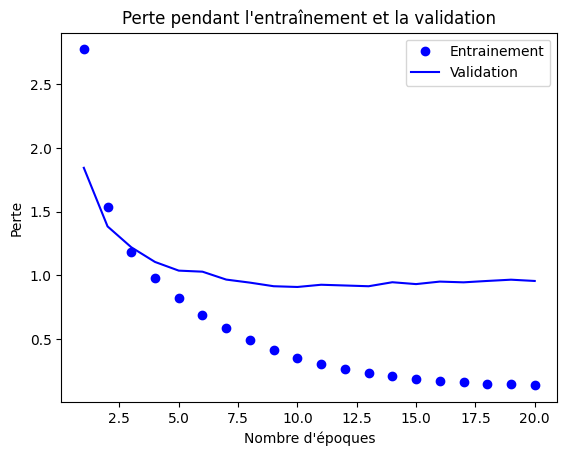

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Entrainement') 
plt.plot(epochs, val_loss, 'b', label='Validation')
plt.title('Perte pendant l\'entraînement et la validation') 
plt.xlabel('Nombre d\'époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

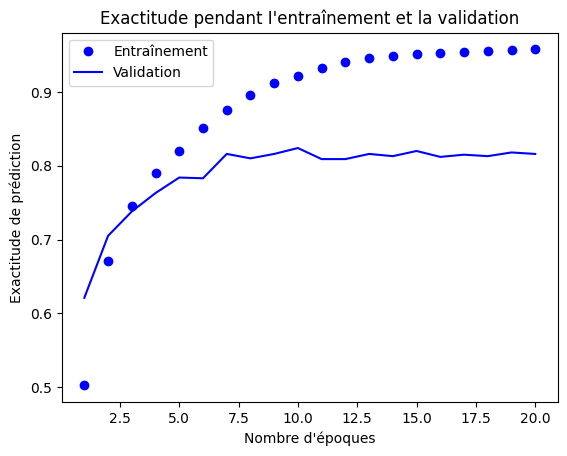

In [ ]:
# Efface la figure plt.c1f()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot (epochs, acc, 'bo', label='Entraînement')
plt.plot (epochs, val_acc, 'b', label='Validation') 
plt.title('Exactitude pendant I\'entraînement et la validation') 
plt.xlabel( 'Nombre d\'époques')
plt.ylabel ('Exactitude de prédiction') 
plt.legend ()
plt.show( )

In [ ]:
model = models.Sequential()
model.add(layers. Dense (64, activation='relu', input_shape=(10000,))) 
model.add(layers. Dense(64, activation='relu'))
model.add(layers. Dense (46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
metrics=[ 'accuracy'])

model. fit(partial_x_train, partial_y_train,
epochs=9,
batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9


/Users/ayoub/miniforge3/envs/keras/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3901 - loss: 3.2455 - val_accuracy: 0.6130 - val_loss: 1.8964
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6435 - loss: 1.7164 - val_accuracy: 0.6740 - val_loss: 1.4318
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7281 - loss: 1.2669 - val_accuracy: 0.7300 - val_loss: 1.2299
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7804 - loss: 1.0502 - val_accuracy: 0.7690 - val_loss: 1.0922
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8201 - loss: 0.8515 - val_accuracy: 0.7800 - val_loss: 1.0091
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8622 - loss: 0.6672 - val_accuracy: 0.7880 - val_loss: 0.9698
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8748 - loss: 0.5823 - val_accuracy: 0.8040 - val_loss: 0.9070
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8951 - loss: 0.4882 - val_accuracy: 0.8100 - val_loss: 0.8901
Epoch 9/9

#### Évaluation et prédiction
Après l'entraînement, le modèle est évalué sur l'ensemble de test pour mesurer sa performance en termes de perte et de précision sur des données non vues pendant l'entraînement. Cette dernière étape confirme l'efficacité du modèle à généraliser à de nouvelles données.

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.7977 - loss: 0.9329


In [ ]:
results

[0.9561399221420288, 0.7853962779045105]